<a href="https://colab.research.google.com/github/ghzljbrz/machin-learning-2024/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Processing

#Part A

##Loading Data

In [ ]:
!pip install --upgrade --no-cache-dir gdown


In [ ]:
!gdown 1kE8rY0J0WX-COzqp4R_3VFLybjKV1izs
#https://drive.google.com/file/d/1kE8rY0J0WX-COzqp4R_3VFLybjKV1izs/view?usp=drive_link

Downloading...
From (original): https://drive.google.com/uc?id=1kE8rY0J0WX-COzqp4R_3VFLybjKV1izs
From (redirected): https://drive.google.com/uc?id=1kE8rY0J0WX-COzqp4R_3VFLybjKV1izs&confirm=t&uuid=d39c61fc-b879-4e93-b3d7-0d1939ee5ec6
To: /content/122.mat
100% 3.92M/3.92M [00:00<00:00, 28.2MB/s]


In [ ]:
!pip install scipy
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data type

In [ ]:
data=scipy.io.loadmat('/content/122.mat')
print(type(data))


<class 'dict'>


In [ ]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X122_DE_time', 'X122_FE_time', 'X122RPM'])


##Saving a signal

In [ ]:
signal=data['X122_DE_time']


#Part B

##Plotting the signal_1

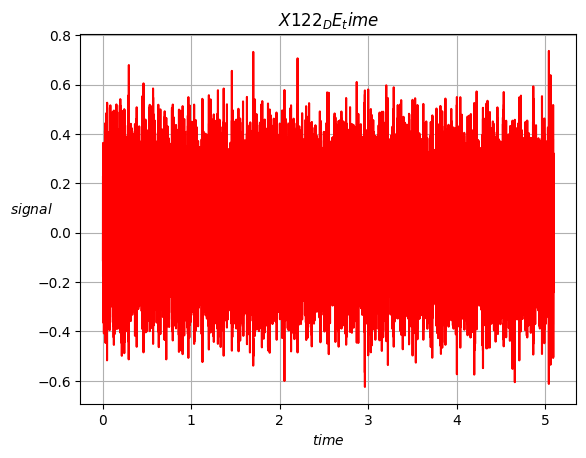

In [ ]:
sampling_rate=48000
time=np.linspace(0,len(signal)/sampling_rate,len(signal))
plt.plot(time,signal,color='red')
plt.xlabel('$time$')
plt.ylabel('$signal$',rotation=0)
plt.title('$X122_DE_time$')
plt.grid(True)
plt.show()


##Plotting the signal(limited domain)

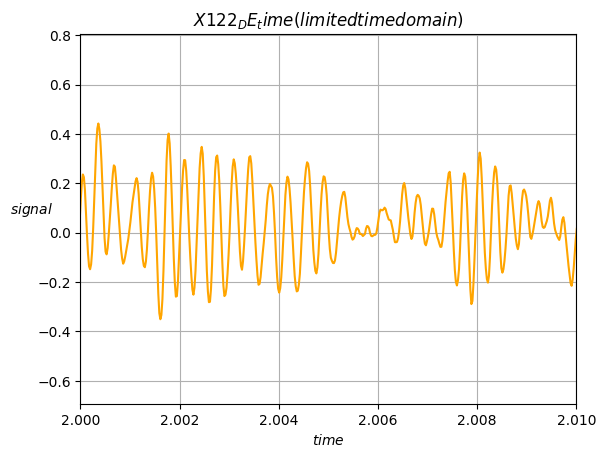

In [ ]:
plt.plot(time,signal,color='orange')
#limiting time domain
plt.xlim(2,2.01)
plt.xlabel('$time$')
plt.ylabel('$signal$',rotation=0)
plt.title('$X122_DE_time(limited time domain)$')
plt.grid(True)
plt.show()

#Part C

##Frequency Analysis

In [ ]:
def fourier_transform(s,sr):
    n=len(s)
    T=1/sr
    y=np.fft.fft(s)
    x=np.fft.fftfreq(n,T)[:n//2]
    positive_freq=np.abs(y[0:n//2])
    dominant_freq=x[np.argmax(positive_freq)]

    return x,positive_freq,dominant_freq

In [ ]:
freqs,positive_values,dominant=fourier_transform(signal,sampling_rate)
print(dominant)

16001.634394191362


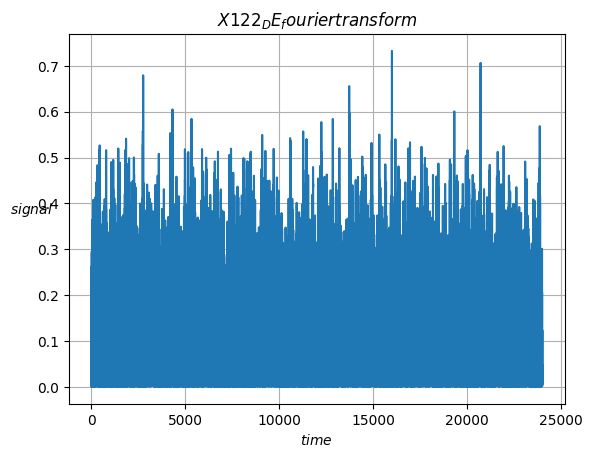

In [ ]:
plt.plot(freqs,positive_values)
plt.xlabel('$time$')
plt.ylabel('$signal$',rotation=0)
plt.title('$X122_DE_fourier transform $')
plt.grid(True)
plt.show()

#Part D

##Signal segments

In [ ]:
segment_size = 128
overlap = 0
segments = []

for i in range(0, len(signal) - segment_size + 1, segment_size - overlap):
    segment = signal[i:i + segment_size]
    segments.append(segment)

segments_array = np.array(segments)
segments_array=np.squeeze(segments_array)
print(segments_array.shape)

(1912, 128)


#Part E



##Pandas Dataframe

In [ ]:
data_frame=pd.DataFrame(segments_array)
print(data_frame)

           0         1         2         3         4         5         6    \
0    -0.111192 -0.083029 -0.042349  0.008970  0.057578  0.095129  0.120997   
1    -0.231563 -0.222593 -0.182538 -0.131636 -0.048816  0.059873  0.164806   
2    -0.038385 -0.146031 -0.252633 -0.332742 -0.364660 -0.349848 -0.295817   
3     0.182121  0.193595  0.180870  0.134557  0.083238  0.033378 -0.013560   
4     0.070303 -0.030875 -0.123292 -0.197559 -0.225513 -0.211953 -0.168978   
...        ...       ...       ...       ...       ...       ...       ...   
1907  0.085741 -0.004590 -0.088453 -0.148743 -0.189423 -0.207990 -0.190466   
1908  0.030041  0.022322  0.012517  0.018775  0.036090  0.051945  0.067174   
1909 -0.454573 -0.507144 -0.472097 -0.352769 -0.187545 -0.000834  0.176906   
1910 -0.020236  0.047356  0.119537  0.173151  0.201731  0.209450  0.192135   
1911 -0.075102 -0.009596  0.066966  0.146031  0.207781  0.245332  0.235110   

           7         8         9    ...       118       119    

##Plotting 13 Multipliers

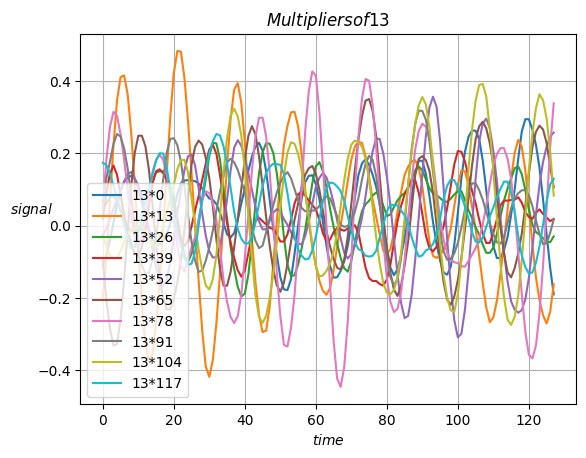

In [ ]:
for i in range(10):
    index=i*13
    if index<len(data_frame):
        plt.plot(data_frame.iloc[index],label=f"13*{index}")
        plt.xlabel('$time$')
        plt.ylabel('$signal$',rotation=0)
        plt.title('$Multipliers of 13$')
        plt.legend()
        plt.grid(True)

#Part E:Feature Extraction

##Deviation,Mean and RMS

In [ ]:
def feature_extraction(s):
    mean=np.mean(s)
    standard_deviation=np.std(s)
    RMS=np.sqrt(np.mean(s**2))
    return mean , standard_deviation, RMS

feature_extraction(signal)

(0.03241888054935761, 0.14587973861066653, 0.1494385557785872)

##Making a data frame

In [ ]:
list_features=[]
for sig in signal:
    extracted_features=feature_extraction(sig)
    list_features.append(extracted_features)
dataframe_features=pd.DataFrame(list_features)
new_names_columns=['MEAN','standard_deviation','RMS']
list_features=[]
for sig in signal:
    extracted_features=feature_extraction(sig)
    list_features.append(extracted_features)
dataframe_features=pd.DataFrame(list_features)
new_names_columns=['MEAN','standard_deviation','RMS']
dataframe_features.columns=new_names_columns
dataframe_features = dataframe_features.reset_index(drop=True)
print(dataframe_features)

            MEAN  standard_deviation       RMS
0      -0.111192                 0.0  0.111192
1      -0.083029                 0.0  0.083029
2      -0.042349                 0.0  0.042349
3       0.008970                 0.0  0.008970
4       0.057578                 0.0  0.057578
...          ...                 ...       ...
244734  0.156670                 0.0  0.156670
244735  0.095963                 0.0  0.095963
244736  0.025868                 0.0  0.025868
244737 -0.028372                 0.0  0.028372
244738 -0.067591                 0.0  0.067591

[244739 rows x 3 columns]


##Save data as csv

In [ ]:
dataframe_features.to_csv('Features_of_a_signal.csv',index=False,header=True)
print(dataframe_features.head())

       MEAN  standard_deviation       RMS
0 -0.111192                 0.0  0.111192
1 -0.083029                 0.0  0.083029
2 -0.042349                 0.0  0.042349
3  0.008970                 0.0  0.008970
4  0.057578                 0.0  0.057578
